In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
from scipy import optimize as opt

import pandas as pd
import xarray as xr

import netCDF4 as nc4

import shutil
import datetime
import subprocess

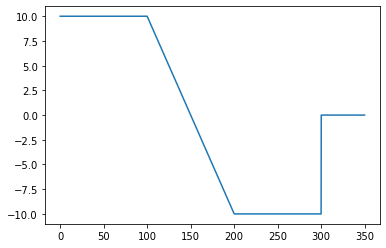

In [2]:
t = np.arange(350 * 12) / 12.
y = np.zeros(350 * 12) * 1.
y[0:1200] = 10.
y[1200:2400] = 10. - (0.2 *  np.arange(100*12)/12.)
y[2400:3601] = -10.


yy = y.cumsum()/12.

plt.plot(t,y)



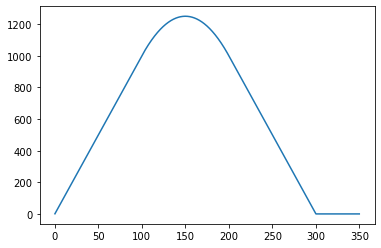

In [3]:
plt.plot(t,yy)

In [4]:
yy

array([0.83333333, 1.66666667, 2.5       , ..., 0.        , 0.        ,
       0.        ])

In [5]:
y_zec = np.zeros(350 * 12) * 1.
y_zec[0:1200] = 10.

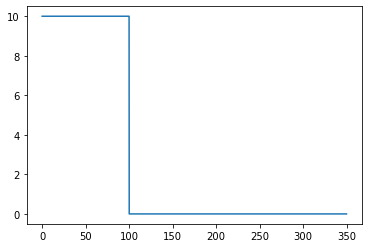

In [6]:
plt.plot(t,y_zec)

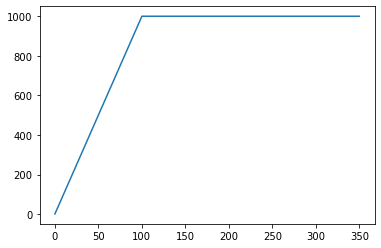

In [7]:

plt.plot(t,y_zec.cumsum()/12.)

In [8]:
y_zec.cumsum()/12.

array([8.33333333e-01, 1.66666667e+00, 2.50000000e+00, ...,
       1.00000000e+03, 1.00000000e+03, 1.00000000e+03])

In [9]:
mapfile = xr.open_dataset('areacella_fx_CESM2_1pctCO2_r1i1p1f1_gn.nc')
areas = mapfile['areacella'].sum()
global_gridcell_integrated_area = float(areas.data)

/Users/CDKoven/miniforge3/lib/python3.9/site-packages/xarray/conventions.py:431: SerializationWarning: variable 'areacella' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [10]:
fname_base = 'emissions_idealized_edrivencdr_000101-031012_fv_0.9x1.25_cdk_20220215.nc'

datestring = str(datetime.date.today().year * 10000 + datetime.date.today().month * 100 + datetime.date.today().day)
fname_new_reversal = 'emissions_idealized_flat10_reversal_cdk_'+datestring+'.nc'
fname_new_zec = 'emissions_idealized_flat10_zec_cdk_'+datestring+'.nc'

shutil.copyfile(fname_base, fname_new_reversal)
shutil.copyfile(fname_base, fname_new_zec)

'emissions_idealized_flat10_zec_cdk_20230808.nc'

In [11]:
file_reversal = nc4.Dataset(fname_new_reversal, 'r+')


In [12]:
time_firstyear = file_reversal.variables['time'][0:12]
time_bnds_firstyear = file_reversal.variables['time_bnds'][0:12,:]

nyears_out = 350
ts_out = nyears_out * 12
year_out = np.floor(np.arange(ts_out) / 12)
month_out = np.tile(time_firstyear,nyears_out)
date_out = year_out*365 + month_out

month_out_bnds = np.tile(time_bnds_firstyear,(nyears_out,1))
#month_out_bnds.shape
date_out_bnds = np.tile(year_out, (2,1)).transpose()*365 + month_out_bnds


file_reversal.variables['time'][:] = date_out

file_reversal.variables['time_bnds'][:] = date_out_bnds

t = date_out / 365.

IM = len(file_reversal.variables['lon'][:])
JM = len(file_reversal.variables['lat'][:])


In [13]:
co2fluxdata_reversal = np.tile(y * 1.e12 * (44.01/12.01) / (global_gridcell_integrated_area * 86400. * 365.), (IM,JM,1))  # IM,JM))

# co2fluxdata.transpose().shape

# file.variables['CO2_flux'][:].shape

In [14]:
file_reversal.variables['CO2_flux'][:] = co2fluxdata_reversal.transpose()

file_reversal.variables['time'].units = 'days since 0001-01-01 00:00:00'

file_reversal.data_title = "Idealized flat10 reversal experiment" ;
file_reversal.data_summary = ""
file_reversal.source_files = "netcdf template from emissions-cmip6_CO2_anthro_surface_175001-201512_fv_0.9x1.25_c20181011.nc. script for generating is on https://github.com/ckoven/flat10. gridcell areas from areacella_fx_CESM2_1pctCO2_r1i1p1f1_gn.nc"
file_reversal.data_creator = "charlie koven, cdkoven@lbl.gov"
file_reversal.creation_date = datetime.date.today().isoformat()
file_reversal.data_script = "make_flat10_forcingfile.ipynb"
file_reversal.data_reference = "n/a"

In [15]:
file_reversal.close()

In [16]:
#genarate a hash of the output file in case future verification is needed
subprocess.run(['md5', fname_new_reversal], stdout=subprocess.PIPE)


CompletedProcess(args=['md5', 'emissions_idealized_flat10_reversal_cdk_20230808.nc'], returncode=0, stdout=b'MD5 (emissions_idealized_flat10_reversal_cdk_20230808.nc) = 2e14f93d2e65c98ff29a45c4b5cc5cd1\n')

In [17]:
file_zec = nc4.Dataset(fname_new_zec, 'r+')


In [18]:
time_firstyear = file_zec.variables['time'][0:12]
time_bnds_firstyear = file_zec.variables['time_bnds'][0:12,:]

nyears_out = 350
ts_out = nyears_out * 12
year_out = np.floor(np.arange(ts_out) / 12)
month_out = np.tile(time_firstyear,nyears_out)
date_out = year_out*365 + month_out

month_out_bnds = np.tile(time_bnds_firstyear,(nyears_out,1))
#month_out_bnds.shape
date_out_bnds = np.tile(year_out, (2,1)).transpose()*365 + month_out_bnds


file_zec.variables['time'][:] = date_out

file_zec.variables['time_bnds'][:] = date_out_bnds

t = date_out / 365.

IM = len(file_reversal.variables['lon'][:])
JM = len(file_reversal.variables['lat'][:])


In [19]:
co2fluxdata_reversal = np.tile(y_zec * 1.e12 * (44.01/12.01) / (global_gridcell_integrated_area * 86400. * 365.), (IM,JM,1))  # IM,JM))

# co2fluxdata.transpose().shape

# file.variables['CO2_flux'][:].shape

In [20]:
file_zec.variables['CO2_flux'][:] = co2fluxdata_reversal.transpose()

file_zec.variables['time'].units = 'days since 0001-01-01 00:00:00'

file_zec.data_title = "Idealized flat10 ZEC experiment" ;
file_zec.data_summary = ""
file_zec.source_files = "netcdf template from emissions-cmip6_CO2_anthro_surface_175001-201512_fv_0.9x1.25_c20181011.nc. script for generating is on https://github.com/ckoven/flat10. gridcell areas from areacella_fx_CESM2_1pctCO2_r1i1p1f1_gn.nc"
file_zec.data_creator = "charlie koven, cdkoven@lbl.gov"
file_zec.creation_date = datetime.date.today().isoformat()
file_zec.data_script = "make_flat10_forcingfile.ipynb"
file_zec.data_reference = "n/a"

In [21]:
file_zec.close()

In [22]:
#genarate a hash of the output file in case future verification is needed
subprocess.run(['md5', fname_new_zec], stdout=subprocess.PIPE)


CompletedProcess(args=['md5', 'emissions_idealized_flat10_zec_cdk_20230808.nc'], returncode=0, stdout=b'MD5 (emissions_idealized_flat10_zec_cdk_20230808.nc) = a4017345e01e67ce793dbb995fa0bc01\n')